# Flux2Mag calculation of DP Leo
#### Kittipong Wangnok
#### School of Physics, Institute of Science

In [1]:
#Import module
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls *_12.log

2013_12_27_run040_dpleo_12.log*


In [3]:
#InputFile = [Default: 2013_12_27_run040_dpleo_12.log]
#InputFile = "2013_12_27_run040_dpleo_12.log"
InputFile = input('Please enter input file \t [Default: File.log] \t:  ') or "2013_12_27_run040_dpleo_12.log"

Please enter input file 	 [Default: File.log] 	:  


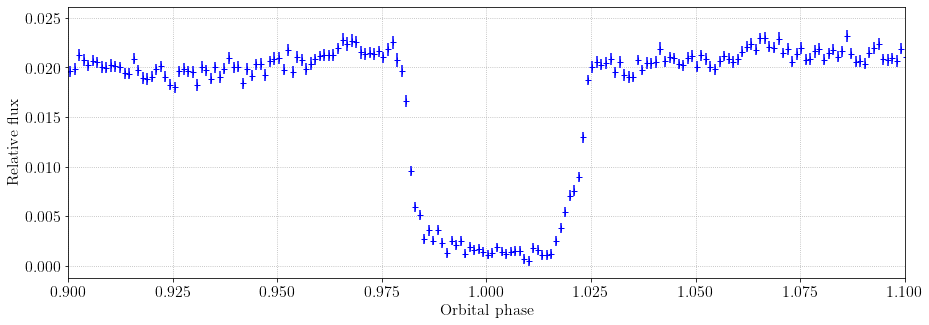

In [4]:
#Read data
Data   = np.genfromtxt(InputFile)
N_data = len(Data)
BJD_time = Data[:,0]
BJD0 = Data[:,1]
P_orb1 = Data[:,2]
Phase1 = Data[:,3]
flux_1 = Data[:,4]
fluxe_1 = Data[:,5]

#Plotgraph before we are going to do the flux normalization
fig=plt.figure(figsize=(15, 5))
plt.errorbar(Phase1, flux_1, yerr=fluxe_1, fmt='+', color='blue')
plt.xlim(0.90,1.1)
plt.xlabel('Orbital phase')
plt.ylabel('Relative flux')
plt.grid(linestyle='dotted')
plt.show()

In [10]:
#print orbital phase and flux
Phase1, flux_1, fluxe_1

(array([0.85628266, 0.85601794, 0.85710244, 0.858188  , 0.85927357,
        0.86035914, 0.86144363, 0.8625292 , 0.86361476, 0.86469926,
        0.86578483, 0.86687039, 0.86795489, 0.86904045, 0.87012602,
        0.87121159, 0.87229608, 0.87338164, 0.87446721, 0.87555171,
        0.87663728, 0.87772284, 0.87880733, 0.8798929 , 0.88097847,
        0.88206403, 0.88314853, 0.88423409, 0.88531966, 0.88640416,
        0.88748972, 0.88857529, 0.88966085, 0.89074535, 0.89183092,
        0.89291648, 0.89400098, 0.89508654, 0.89617211, 0.89725661,
        0.89834217, 0.89942774, 0.9005133 , 0.9015978 , 0.90268337,
        0.90376893, 0.90485343, 0.90593899, 0.90702456, 0.90811013,
        0.90919462, 0.91028019, 0.91136575, 0.91245025, 0.91353582,
        0.91462138, 0.91570587, 0.91679144, 0.91787701, 0.91896258,
        0.92004707, 0.92113263, 0.9222182 , 0.9233027 , 0.92438827,
        0.92547383, 0.92655832, 0.92764389, 0.92872946, 0.92981502,
        0.93089952, 0.93198508, 0.93307065, 0.93

In [ ]:
del_M = 2.5*

In [5]:
#Input data to to the flux normalization
x = Phase1
y = flux_1
y_err = fluxe_1

In [6]:
#Set the range of phase to do the flux normalization
#Maximum phase average
a = float(input('Please input a \t [Default: 0.925] \t:  ') or "0.925")
b = float(input('Please input b \t [Default: 0.950] \t:  ') or "0.950")

#Set the range of phase to do the flux normalization
#Minimum phase average
c = float(input('Please input c \t [Default: 0.990] \t:  ') or "0.990")
d = float(input('Please input d \t [Default: 1.010] \t:  ') or "1.010")

Please input a 	 [Default: 0.925] 	:  
Please input b 	 [Default: 0.950] 	:  
Please input c 	 [Default: 0.990] 	:  
Please input d 	 [Default: 1.010] 	:  


In [7]:
#Arrrays
x_a = [i for i in range(len(x))]
y_a = [i for i in range(len(x))]
n_a = [i for i in range(len(x))]
ne_a = [i for i in range(len(x))]

In [8]:
#Determine the phase maximum
for i in range(len(x)):
    if x[i] >= a and x[i] <= b:
        print (i,x[i],y[i])

65 0.9254738295567222 0.01799131294943307
66 0.926558324132202 0.019612197165794383
67 0.9276438939559739 0.019862701756644945
68 0.9287294563073374 0.0196117143273385
69 0.9298150186623388 0.019495242912382336
70 0.9308995207065891 0.018236931552042836
71 0.9319850830615906 0.020031647874573885
72 0.9330706528817245 0.019703800642690256
73 0.9341551474572043 0.018863056595619796
74 0.9352407098122058 0.020006428279337376
75 0.9363262796323397 0.019018360032184916
76 0.9374118419873412 0.01988714289736278
77 0.9384963440315914 0.02097993739207033
78 0.9395819063865929 0.020020320897508975
79 0.9406674687379564 0.020088252975075774
80 0.9417519707858446 0.01841055734387493
81 0.9428375331372081 0.019876505569664814
82 0.9439230954922095 0.01917408855000961
83 0.9450075975364598 0.02032760078763992
84 0.9460931598914613 0.020349629175125374
85 0.9471787297115952 0.019219343382520397
86 0.9482642920665967 0.020612112503084052
87 0.9493487866420764 0.020888236056508403


In [9]:
#Input the initial and final numbers to calculate the maximum of baseline
max_inertial = int(input('Please input max_inertial \t [Default: 65] \t:  ') or "65")
max_final = int(input('Please input max_final \t [Default: 87] \t:  ') or "87")

#Input for sorting
a = max_inertial
b = max_final + 1

#Sort the data
max_val = np.median(np.sort(y[a:b]))
max = max_val
print ('The baseline maximum is:', max)

Please input max_inertial 	 [Default: 65] 	:  
Please input max_final 	 [Default: 87] 	:  
The baseline maximum is: 0.019862701756644945


In [10]:
#Determine the phase minimum
for i in range(len(x)):
    if x[i] >= c and x[i] <= d:
        print (i,x[i],y[i])

125 0.9905885225562088 0.0012669963936795356
126 0.9916740849112102 0.0025222532348846264
127 0.9927585869554605 0.0020539064290556837
128 0.9938441493104619 0.0024948278951569553
129 0.9949297191305959 0.001200965391410788
130 0.9960152814819594 0.001861653349434119
131 0.9970997760610771 0.0015610757886676632
132 0.9981853458812111 0.0016454267564930626
133 0.9992709082362126 0.0013264987684257442
134 1.0003554028116923 0.0010985748465446453
135 1.0014409726354643 0.0012855707754715906
136 1.0025265349868278 0.0018331114768682538
137 1.0036121048105997 0.0014125249057604118
138 1.0046965993860795 0.001157274935459667
139 1.005782161741081 0.0014051242942882917
140 1.006867731561215 0.001476052982533373
141 1.0079522261403326 0.0014593201479125206
142 1.0090377959604666 0.0006391605209439637


In [11]:
#Input the initial and final numbers to calculate the miminum of baseline
min_inertial = int(input('Please input min_inertial \t [Default: 125] \t:  ') or "125")
min_final = int(input('Please input min_final \t [Default: 142] \t:  ') or "142")

#Input for sorting
c = min_inertial
d = min_final + 1

#Sort the data
min_val = np.median(np.sort(y[c:d]))
min = min_val
print ('The baseline minimum is:', min)

Please input min_inertial 	 [Default: 125] 	:  
Please input min_final 	 [Default: 142] 	:  
The baseline minimum is: 0.0014359225268364662


In [12]:
######### ignore 0/0 #########
np.seterr(divide='ignore', invalid='ignore')
##############################
# Normalized flux calculation #
##############################
for i in range(len(x)):
    normalized = (y[i]-min)/(max-min)
    normalized_err = (max-min)*y_err[i]/(max-min)**2
    x_a[i] = x[i]
    n_a[i] = normalized
    ne_a[i] = normalized_err
#    print (x[i], normalized, normalized_err)

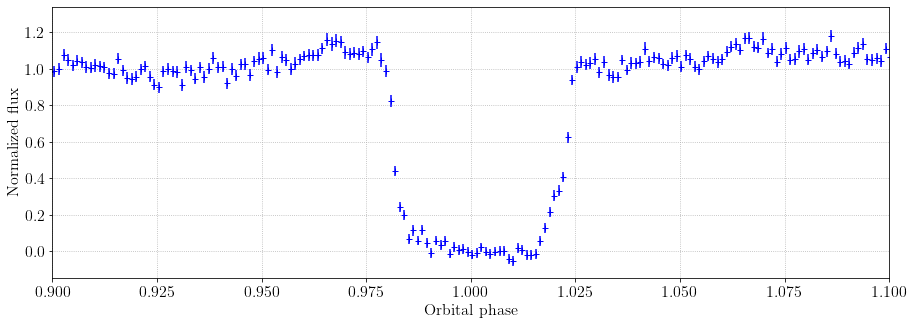

In [13]:
#Plotgraph before we are going to do the flux normalization
fig=plt.figure(figsize=(15, 5))
plt.errorbar(x_a, n_a, yerr=ne_a, fmt='+', color='blue')
plt.xlim(0.90,1.1)
plt.xlabel('Orbital phase')
plt.ylabel('Normalized flux')
plt.grid(linestyle='dotted')
#plt.savefig("2013_12_28_run009_uzfor_12_Normalized.png")
plt.savefig("2013_12_27_run040_dpleo_Normalized.png")
plt.show()

In [14]:
#Save output file: 
#[Default: 2013_12_28_run009_uzfor_12_Normalized.out]
np.savetxt('2013_12_27_run040_dpleo_Normalized.out', np.c_[BJD_time,x_a,n_a,ne_a], comments='#BJD, Phase, flux_1, fluxe_1')